In [11]:
!pip install setuptools
#install scikit-learn
!pip install scikit-learn
#install EMLearn
!pip install emlearn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import glob

# Define the path to the CSV files
path = 'expanded_data/'  # Update this path to your actual data directory
activities = ['ret', 'lav', 'hoj']
labels = ['ret', 'lav', 'hoj']
dfs_train = []
dfs_test = []

# Read the CSV files and split each into train and test sets
for activity in activities:
    files = glob.glob(path + f"*{activity}*.csv")  # Match the naming pattern
    for filename in files:
        df = pd.read_csv(filename)
        df['activity'] = activity  # Assign the activity based on the loop variable
        
        # Split the data: first two-thirds for training, last one-third for testing
        split_index = int(len(df) * 2 / 3)
        dfs_train.append(df[:split_index])
        dfs_test.append(df[split_index:])

# Combine all training and testing data
df_train = pd.concat(dfs_train, ignore_index=True)
df_test = pd.concat(dfs_test, ignore_index=True)

# Verify the splits
print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

Train data shape: (147678, 9)
Test data shape: (73845, 9)


In [13]:
x_list = []
y_list = []
z_list = []
pressure_list = []
gyroX_list = []
gyroY_list = []
gyroZ_list = []
train_labels = []

window_size = 900
step_size = 450

# creating overlaping windows of size window-size 900 and step size 450
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['accX'].values[i: i + window_size]
    ys = df_train['accY'].values[i: i + window_size]
    zs = df_train['accZ'].values[i: i + window_size]
    pressures = df_train['pressure'].values[i: i + window_size]
    gyroXs = df_train['gyroX'].values[i: i + window_size]
    gyroYs = df_train['gyroY'].values[i: i + window_size]
    gyroZs = df_train['gyroZ'].values[i: i + window_size]
    label = df_train['activity'][i: i + window_size].mode()[0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    pressure_list.append(pressures)
    gyroX_list.append(gyroXs)
    gyroY_list.append(gyroYs)
    gyroZ_list.append(gyroZs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())
X_train['pressure_mean'] = pd.Series(pressure_list).apply(lambda x: x.mean())
X_train['gyroY_mean'] = pd.Series(gyroY_list).apply(lambda x: x.mean())
X_train['gyroZ_mean'] = pd.Series(gyroZ_list).apply(lambda x: x.mean())

# min
X_train['pressure_min'] = pd.Series(pressure_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())

# max
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['pressure_max'] = pd.Series(pressure_list).apply(lambda x: x.max())

# median
X_train['pressure_median'] = pd.Series(pressure_list).apply(lambda x: np.median(x))

# energy
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/window_size)
X_train['pressure_energy'] = pd.Series(pressure_list).apply(lambda x: np.sum(x**2)/window_size)

# Custom ratios
X_train['acc_gyro_ratio_y'] = X_train['y_mean'] / (X_train['gyroY_mean'] + 1e-6)
X_train['acc_gyro_ratio_z'] = X_train['z_mean'] / (X_train['gyroZ_mean'] + 1e-6)

In [14]:
x_list = []
y_list = []
z_list = []
pressure_list = []
gyroX_list = []
gyroY_list = []
gyroZ_list = []
test_labels = []

window_size = 900
step_size = 450

# creating overlaping windows of size window-size 900 and step size 450
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['accX'].values[i: i + window_size]
    ys = df_test['accY'].values[i: i + window_size]
    zs = df_test['accZ'].values[i: i + window_size]
    pressures = df_test['pressure'].values[i: i + window_size]
    gyroXs = df_test['gyroX'].values[i: i + window_size]
    gyroYs = df_test['gyroY'].values[i: i + window_size]
    gyroZs = df_test['gyroZ'].values[i: i + window_size]
    label = df_test['activity'][i: i + window_size].mode()[0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    pressure_list.append(pressures)
    gyroX_list.append(gyroXs)
    gyroY_list.append(gyroYs)
    gyroZ_list.append(gyroZs)
    test_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())
X_test['pressure_mean'] = pd.Series(pressure_list).apply(lambda x: x.mean())
X_test['gyroY_mean'] = pd.Series(gyroY_list).apply(lambda x: x.mean())
X_test['gyroZ_mean'] = pd.Series(gyroZ_list).apply(lambda x: x.mean())

# min
X_test['pressure_min'] = pd.Series(pressure_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())

# max
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['pressure_max'] = pd.Series(pressure_list).apply(lambda x: x.max())

# median
X_test['pressure_median'] = pd.Series(pressure_list).apply(lambda x: np.median(x))

# energy
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/window_size)
X_test['pressure_energy'] = pd.Series(pressure_list).apply(lambda x: np.sum(x**2)/window_size)

# Custom ratios
X_test['acc_gyro_ratio_y'] = X_test['y_mean'] / (X_test['gyroY_mean'] + 1e-6)
X_test['acc_gyro_ratio_z'] = X_test['z_mean'] / (X_test['gyroZ_mean'] + 1e-6)

In [15]:
# Verify the splits
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

from sklearn.impute import SimpleImputer

# Verify that there are no NaN values
print("NaN in X_train before imputation:", X_train.isnull().sum().sum())
print("NaN in X_test before imputation:", X_test.isnull().sum().sum())

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify that there are no NaN values
print("NaN in X_train after imputation:", X_train.isnull().sum().sum())
print("NaN in X_test after imputation:", X_test.isnull().sum().sum())

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Train data shape: (327, 14)
Test data shape: (163, 14)
NaN in X_train before imputation: 0
NaN in X_test before imputation: 0
NaN in X_train after imputation: 0
NaN in X_test after imputation: 0


Accuracy: 0.8957055214723927

 -------------Classification Report-------------

              precision    recall  f1-score   support

         hoj       1.00      1.00      1.00        52
         lav       0.76      1.00      0.87        55
         ret       1.00      0.70      0.82        56

    accuracy                           0.90       163
   macro avg       0.92      0.90      0.90       163
weighted avg       0.92      0.90      0.89       163



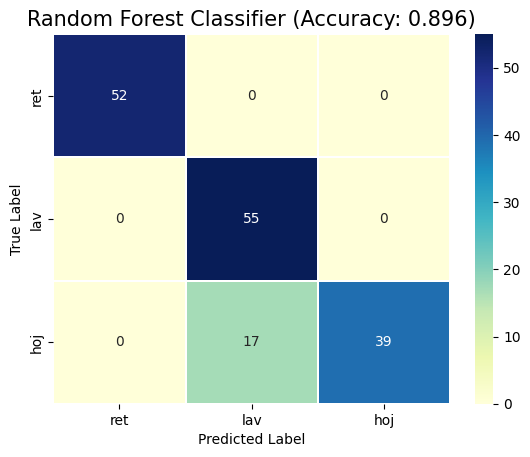

In [17]:
#lets try random forrest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
rf = RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=13, random_state = 21)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, linewidths=0.1, fmt="d", cmap='YlGnBu')
plt.title(f"Random Forest Classifier (Accuracy: {accuracy:.3f})", fontsize=15)  # Add accuracy to the title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [18]:
import emlearn

# Convert model using emlearn
path = 'random_forest_model.h'
cmodel = emlearn.convert(rf, method='inline')
cmodel.save(file=path, name='random_forest_model')
print('Wrote model to', path)

Wrote model to random_forest_model.h


In [25]:
rf_float = emlearn.convert(rf, dtype='float', method='inline')
rf_float.save(file='random_forest_model_float.h', name='random_forest_model_float')

rf_int = emlearn.convert(rf, dtype='int', method='inline')
rf_int.save(file='random_forest_model_int.h', name='random_forest_model_int')

rf_int8 = emlearn.convert(rf, dtype='int8', method='inline')
rf_int8.save(file='random_forest_model_int8.h', name='random_forest_model_int8')

rf_int16 = emlearn.convert(rf, dtype='int16', method='inline')
rf_int16.save(file='random_forest_model_int16.h', name='random_forest_model_int16')

rf_int32 = emlearn.convert(rf, dtype='int32', method='inline')
rf_int32.save(file='random_forest_model_int32.h', name='random_forest_model_int32')

'\n\n\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nstatic const EmlTreesNode random_forest_model_int32_nodes[31] = {\n  { 12, 0, 1, 2 },\n  { 1, 0, -1, -2 },\n  { 10, 0, -3, -2 },\n  { 10, 0, -3, 1 },\n  { 2, 0, -2, -1 },\n  { 2, 0, 1, -1 },\n  { 10, 0, -3, -2 },\n  { 9, 0, 1, -1 },\n  { 10, 0, -3, -2 },\n  { 11, 0, 1, -1 },\n  { 9, 0, -3, -2 },\n  { 10, 0, -3, 1 },\n  { 2, 0, -2, -1 },\n  { 9, 0, 1, -1 },\n  { 12, 0, -2, -3 },\n  { 7, 0, 1, 2 },\n  { 2, 0, -2, -1 },\n  { 0, 1, -3, -2 },\n  { 5, 0, 1, 2 },\n  { 7, 0, -2, -3 },\n  { 2, 0, -2, -1 },\n  { 12, 0, 1, 2 },\n  { 11, 0, -2, -1 },\n  { 7, 1, -3, -2 },\n  { 9, 0, 1, -1 },\n  { 10, 0, -3, -2 },\n  { 2, 0, 1, -1 },\n  { 7, 0, -2, -3 },\n  { 7, 0, 1, 2 },\n  { 9, 0, -2, -1 },\n  { 0, 1, -3, -2 } \n};\n\nstatic const int32_t random_forest_model_int32_tree_roots[13] = { 0, 3, 5, 7, 9, 11, 13, 15, 18, 21, 24, 26, 28 };\n\nstatic const uint8_t random_forest_model_int32_leaves[3] = { 2, 1, 

In [27]:
import os

files = [
    'random_forest_model_float.h',
    'random_forest_model_int.h',
    'random_forest_model_int8.h',
    'random_forest_model_int16.h',
    'random_forest_model_int32.h'
]

for f in files:
    if os.path.exists(f):
        size = os.path.getsize(f)
        print(f"{f}: {size/1024:.2f} KB")
    else:
        print(f"{f}: not found")

random_forest_model_float.h: 8.59 KB
random_forest_model_int.h: 7.98 KB
random_forest_model_int8.h: 8.03 KB
random_forest_model_int16.h: 8.08 KB
random_forest_model_int32.h: 8.08 KB


In [28]:
import pandas as pd

sizes = []
for f in files:
    if os.path.exists(f):
        size = os.path.getsize(f)
        sizes.append({'dtype': f.split('_')[-1].replace('.h',''), 'size_kb': size/1024})
    else:
        sizes.append({'dtype': f.split('_')[-1].replace('.h',''), 'size_kb': None})

df_sizes = pd.DataFrame(sizes)
display(df_sizes)

,dtype,size_kb
0,float,8.585938
1,int,7.984375
2,int8,8.031250
3,int16,8.078125
4,int32,8.078125
